<a href="https://colab.research.google.com/github/ronakvaghela454/CN6005-Portfolio/blob/main/CN6005week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas
import pandas as pd
col_names = ['Passengerld', 'Pclass', 'Name', 'Sex', 'Age', 'Ticket', 'Fare', 'Survived']
# load dataset
csvfile="titanic week3.csv"
#please note your csvfilePAth would be the path where you uploaded and saved the diabetesN.csv
csvfilePath='/content/'+csvfile
pima = pd.read_csv(csvfilePath)
pima.head()

,PassengerId,Pclass,Name,Sex,Age,Ticket,Fare,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,1
4,5,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,0


In [ ]:
pima['Age'].value_counts()

,count
Age,
24.00,30
22.00,27
18.00,26
28.00,25
30.00,25
...,...
24.50,1
0.67,1
0.42,1


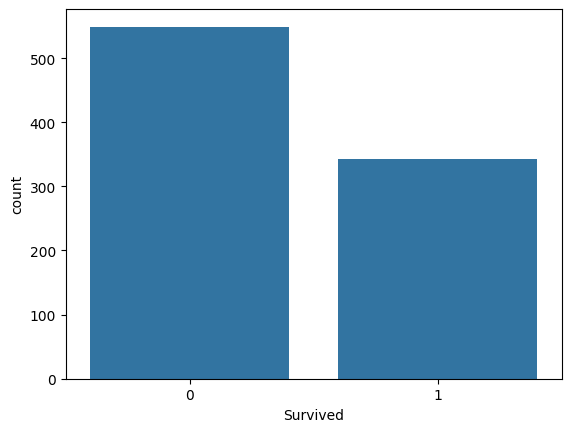

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# count plot on single categorical variable
sns.countplot(x ='Survived', data =pima )

# Show the plot
plt.show()

In [ ]:
count_no_sub = len(pima[pima['Survived']==0])
count_sub = len(pima[pima['Survived']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of not sorviving is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of Survivors", pct_of_sub*100)

percentage of not sorviving is 61.61616161616161
percentage of Survivors 38.38383838383838


In [ ]:
pima.groupby('Survived')

In [ ]:
#split dataset in features and target variable
# Corrected column names to match the DataFrame and excluded 'Survived' from features
# Also, drop 'Name' and 'Ticket' as they are not numerical and not typically used directly in logistic regression.
# Convert 'Sex' to numerical using one-hot encoding.
feature_cols = ['PassengerId', 'Pclass', 'Sex', 'Age', 'Fare'] # Removed 'Name' and 'Ticket'
X = pima[feature_cols].copy() # Features

# Convert 'Sex' column to numerical (0 for male, 1 for female)
X['Sex'] = X['Sex'].map({'male': 0, 'female': 1})

# Corrected target variable to 'Survived'
y = pima.Survived # Target variable
X
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [ ]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer # Import SimpleImputer

# Instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# Create an imputer to fill missing 'Age' values with the mean
# We fit the imputer only on the training data to avoid data leakage
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Convert back to DataFrame, retaining column names for clarity
X_train_imputed = pd.DataFrame(X_train_imputed, columns=X_train.columns)
X_test_imputed = pd.DataFrame(X_test_imputed, columns=X_test.columns)

# Fit the model with the imputed data
logreg.fit(X_train_imputed, y_train)

y_pred = logreg.predict(X_test_imputed)

In [ ]:
print(y_test.value_counts())

Survived
0    137
1     86
Name: count, dtype: int64


In [ ]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix


array([[116,  21],
       [ 29,  57]])

Text(0.5, 427.9555555555555, 'Predicted label')

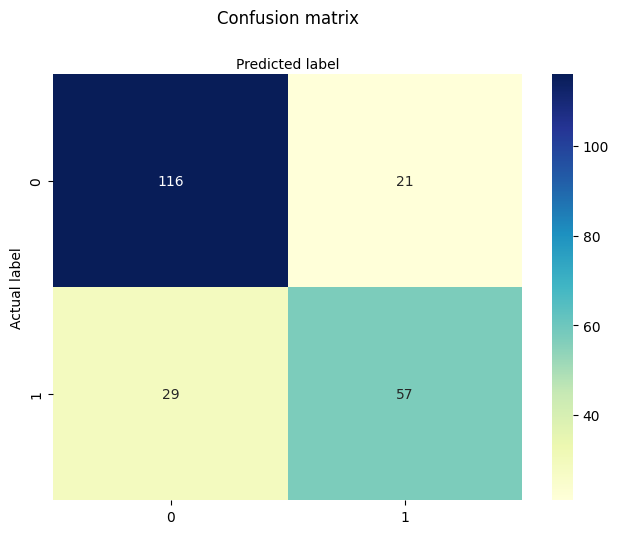

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))

0.7307692307692307
0.6627906976744186


In [ ]:
from sklearn.metrics import classification_report
target_names = ['Not survived', 'Survived']
print(classification_report(y_test, y_pred, target_names=target_names))


              precision    recall  f1-score   support

Not survived       0.80      0.85      0.82       137
    Survived       0.73      0.66      0.70        86

    accuracy                           0.78       223
   macro avg       0.77      0.75      0.76       223
weighted avg       0.77      0.78      0.77       223



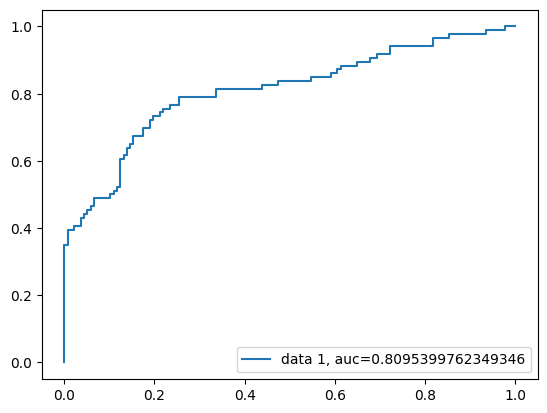

In [ ]:
y_pred_proba = logreg.predict_proba(X_test_imputed)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer # Import SimpleImputer

# Impute missing values in the entire X before applying SMOTE
# Re-instantiate the imputer to fit on the entire X, or use the previously fitted one
imputer_smote = SimpleImputer(strategy='mean')
X_imputed_for_smote = imputer_smote.fit_transform(X)
X_imputed_for_smote = pd.DataFrame(X_imputed_for_smote, columns=X.columns)

X_resampled, y_resampled = SMOTE().fit_resample(X_imputed_for_smote, y)

y_resampled.value_counts()

,count
Survived,
0,549
1,549


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=16)

logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix


array([[112,  23],
       [ 28, 112]])

Text(0.5, 427.9555555555555, 'Predicted label')

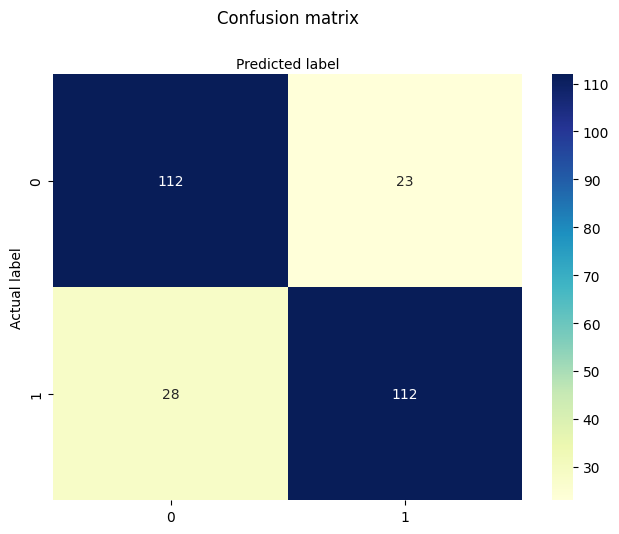

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))


0.8296296296296296
0.8


In [ ]:
from sklearn.metrics import classification_report
target_names = ['Not survived', 'Survived']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

Not survived       0.80      0.83      0.81       135
    Survived       0.83      0.80      0.81       140

    accuracy                           0.81       275
   macro avg       0.81      0.81      0.81       275
weighted avg       0.82      0.81      0.81       275



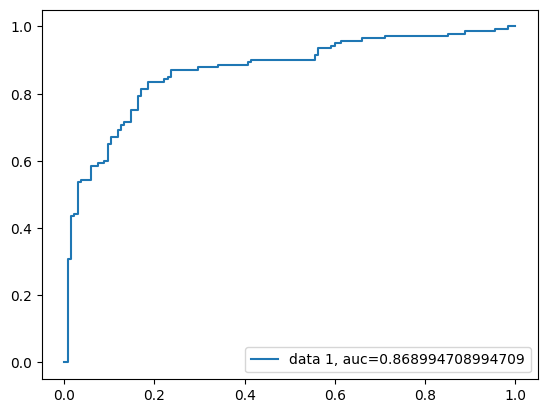

In [ ]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
